# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

['taolanaro',
 'cayenne',
 'beloha',
 'sao joao del rei',
 'sataua',
 'bluff',
 'busselton',
 'riyadh',
 'taltal',
 'dikson',
 'vaini',
 'ancud',
 'puerto ayora',
 'sitka',
 'walvis bay',
 'yacuiba',
 'rikitea',
 'atuona',
 'illoqqortoormiut',
 'vardo',
 'kadykchan',
 'ushuaia',
 'neuquen',
 'mataura',
 'gamba',
 'alice springs',
 'provideniya',
 'saint george',
 'tiksi',
 'sangueya',
 'qaanaaq',
 'attawapiskat',
 'svetlyy',
 'batticaloa',
 'matay',
 'semey',
 'jamestown',
 'nome',
 'albany',
 'amderma',
 'tamboril',
 'hobart',
 'pisco',
 'kamen-rybolov',
 'nanortalik',
 'lebu',
 'bredasdorp',
 'kutum',
 'dunedin',
 'coolum beach',
 'camopi',
 'cidreira',
 'sentyabrskiy',
 'anar darreh',
 'arraial do cabo',
 'opuwo',
 'cape town',
 'half moon bay',
 'hithadhoo',
 'brigantine',
 'hilo',
 'paragominas',
 'kapaa',
 'armacao dos buzios',
 'scarborough',
 'butaritari',
 'port-cartier',
 'chicama',
 'abong mbang',
 'tuatapere',
 'evensk',
 'bilma',
 'tasiilaq',
 'menongue',
 'saldanha',
 'cl

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [8]:
url = "http://history.openweathermap.org/data/2.5/aggregated/day?"
query_url = url + "appid=" + weather_api_key + "&month=9&day=22q="
query_url
weather_api_key

'83a699f14ace1d99da48f46da8bf6230'

In [ ]:
https://history.openweathermap.org/data/2.5/aggregated/day?q=London&month=2&day=1&appid=83a699f14ace1d99da48f46da8bf6230

In [8]:
# Build query URL ***********is current weather the right query to use?
#using statistical daily api, https://openweathermap.org/api/statistics-api#day
#using an equinox date, September 22, so there are no extremes of summmer/winter in either hemisphere
url = "http://api.openweathermap.org/data/2.5/aggregated/day?"
query_url = url + "appid=" + weather_api_key + "&month=9&day=22q=" 

#record counter
count = 1

#blank lists for data
cloudiness=[]
country=[]
date=[]
humidity=[]
max_temp=[]
wind_speed=[]
long=[]
lati=[]
cities_found=[]

print(f"Beginning Data Retrieval:\n-----------------------------")

#loop through each city and append appropriate data
for city in cities:    
    try:
        weather_json = requests.get(query_url + city).json()
        
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])   
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        long.append(weather_json['coord']['lon'])
        lati.append(weather_json['coord']['lat'])
        cities_found.append(weather_json['name'])
        
        print(f"Processing Record {count} | {city}")
        count += 1
        
    except:
        print(f"City {city} not found. Skipping...")
        pass

Beginning Data Retrieval:
-----------------------------
Processing Record 1 | bluff
Processing Record 2 | rikitea
Processing Record 3 | loandjili
Processing Record 4 | lavrentiya
Processing Record 5 | eureka
Processing Record 6 | acapulco
Processing Record 7 | airai
Processing Record 8 | deputatskiy
Processing Record 9 | korla
Processing Record 10 | butaritari
Processing Record 11 | puerto ayora
Processing Record 12 | hermanus
Processing Record 13 | souillac
Processing Record 14 | alice springs
Processing Record 15 | arraial do cabo
Processing Record 16 | punta arenas
Processing Record 17 | geraldton
Processing Record 18 | cape town
Processing Record 19 | amapa
Processing Record 20 | farafangana
Processing Record 21 | busselton
Processing Record 22 | tuktoyaktuk
Processing Record 23 | lebu
Processing Record 24 | belyy yar
Processing Record 25 | half moon bay
Processing Record 26 | dikson
Processing Record 27 | albany
Processing Record 28 | sharya
Processing Record 29 | vanavara
Process

Processing Record 222 | kulhudhuffushi
Processing Record 223 | studena
City alotau not found. Skipping...
Processing Record 224 | stepantsevo
Processing Record 225 | khatanga
Processing Record 226 | srednekolymsk
Processing Record 227 | clarence town
Processing Record 228 | flin flon
Processing Record 229 | povoa de lanhoso
Processing Record 230 | canon city
Processing Record 231 | berlevag
Processing Record 232 | urupes
Processing Record 233 | cantaura
Processing Record 234 | new norfolk
Processing Record 235 | harare
Processing Record 236 | pontes e lacerda
Processing Record 237 | tromso
Processing Record 238 | nantucket
City samusu not found. Skipping...
Processing Record 239 | tuatapere
Processing Record 240 | gloucester
Processing Record 241 | norman wells
Processing Record 242 | kudahuvadhoo
Processing Record 243 | ajdabiya
Processing Record 244 | beian
Processing Record 245 | ailigandi
Processing Record 246 | coquimbo
Processing Record 247 | dingle
Processing Record 248 | fengch

Processing Record 441 | taihe
Processing Record 442 | lerum
Processing Record 443 | oyem
Processing Record 444 | portland
Processing Record 445 | kambove
Processing Record 446 | uvat
Processing Record 447 | lorain
Processing Record 448 | novobirilyussy
Processing Record 449 | skjervoy
Processing Record 450 | escarcega
Processing Record 451 | malakal
Processing Record 452 | safford
Processing Record 453 | arcachon
Processing Record 454 | iberia
City viligili not found. Skipping...
Processing Record 455 | opunake
Processing Record 456 | cabras
Processing Record 457 | barguzin
Processing Record 458 | praia
Processing Record 459 | gambela
Processing Record 460 | valparaiso
Processing Record 461 | maarianhamina
Processing Record 462 | auki
Processing Record 463 | whyalla
Processing Record 464 | bubaque
Processing Record 465 | san carlos del zulia
Processing Record 466 | gushikawa
Processing Record 467 | acarigua
Processing Record 468 | namatanai
Processing Record 469 | pochutla
City barawe 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#make data frame
city_weather_df = pd.DataFrame({
    'City': cities_found,
    'Lat': lati,
    'Lng': long,
    'Max Temp':max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed':wind_speed,
    'Country': country,
    'Date':date
})

#display DF
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,51.55,92,100,1.90,NZ,1635259192
1,Rikitea,-23.1203,-134.9692,75.31,77,100,16.46,PF,1635259192
2,Loandjili,-4.7561,11.8578,82.51,78,75,13.80,CG,1635259192
3,Lavrentiya,65.5833,-171.0000,15.17,76,100,7.20,RU,1635259192
4,Eureka,40.8021,-124.1637,54.19,75,100,1.99,US,1635258921


In [10]:
#export DF to csv file
city_weather_df.to_csv("../" + output_data_file)

In [11]:
#summary stats for df
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,19.669150,13.350811,63.523873,69.826816,59.996276,7.955345,1.635259e+09
std,32.346979,90.168072,21.860107,21.454346,38.203159,6.235637,8.094598e+01
min,-54.800000,-175.200000,-21.280000,7.000000,0.000000,0.000000,1.635258e+09
25%,-5.795000,-65.712500,48.970000,57.000000,20.000000,3.440000,1.635259e+09
50%,22.890900,20.040300,69.760000,75.000000,75.000000,6.670000,1.635259e+09
75%,46.433300,88.397200,80.280000,86.000000,97.000000,10.960000,1.635259e+09
max,78.218600,179.316700,102.630000,100.000000,100.000000,36.820000,1.635259e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
x_latitude = city_weather_df["Lat"]

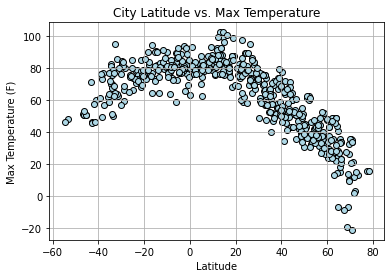

In [13]:
plt.scatter(x_latitude, city_weather_df["Max Temp"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("../output_data/max_temp")

## Latitude vs. Humidity Plot

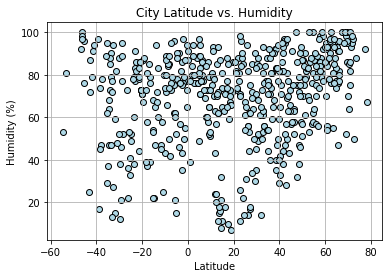

In [14]:
plt.scatter(x_latitude, city_weather_df["Humidity"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("../output_data/humidity")

## Latitude vs. Cloudiness Plot

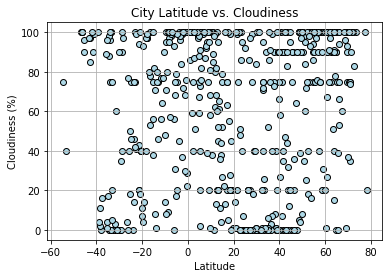

In [15]:
plt.scatter(x_latitude, city_weather_df["Cloudiness"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("../output_data/Cloudiness")

## Latitude vs. Wind Speed Plot

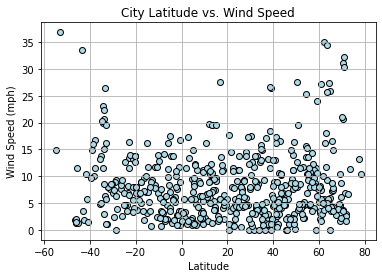

In [16]:
plt.scatter(x_latitude, city_weather_df["Wind Speed"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("../output_data/wind_speed")

## Linear Regression

In [17]:
#separate latitude into north (>=0) and south (<0) for x axes
x_north_lat = x_latitude.loc[x_latitude >= 0]
x_south_lat = x_latitude.loc[x_latitude < 0]

In [19]:
#set columns as variables for y axes
y_north_max_temp = city_weather_df["Max Temp"].loc[city_weather_df["Lat"] >= 0]
y_south_max_temp = city_weather_df["Max Temp"].loc[city_weather_df["Lat"] < 0]

y_north_humid = city_weather_df["Humidity"].loc[city_weather_df["Lat"] >= 0]
y_south_humid = city_weather_df["Humidity"].loc[city_weather_df["Lat"] < 0]

y_north_cloudy = city_weather_df["Cloudiness"].loc[city_weather_df["Lat"] >= 0]
y_south_cloudy = city_weather_df["Cloudiness"].loc[city_weather_df["Lat"] < 0]

y_north_wind_speed = city_weather_df["Wind Speed"].loc[city_weather_df["Lat"] >= 0]
y_south_wind_speed = city_weather_df["Wind Speed"].loc[city_weather_df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.88546


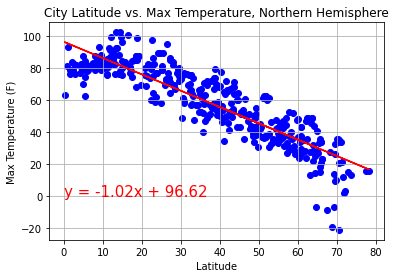

In [20]:
plt.scatter(x_north_lat, y_north_max_temp, facecolor="blue")
plt.title("City Latitude vs. Max Temperature, Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_max_temp)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.64892


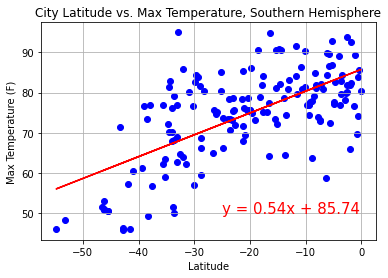

In [22]:
plt.scatter(x_south_lat, y_south_max_temp, facecolor="blue")
plt.title("City Latitude vs. Max Temperature, Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_max_temp)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.2799


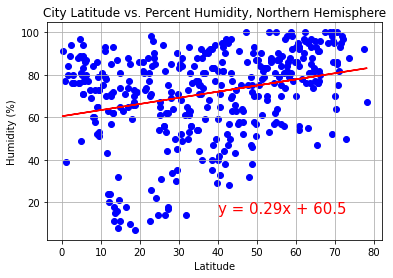

In [24]:
plt.scatter(x_north_lat, y_north_humid, facecolor="blue")
plt.title("City Latitude vs. Percent Humidity, Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_humid)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.01606


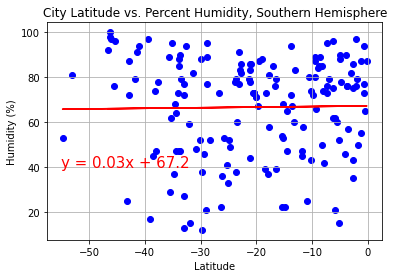

In [29]:
plt.scatter(x_south_lat, y_south_humid, facecolor="blue")
plt.title("City Latitude vs. Percent Humidity, Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_humid)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.16791


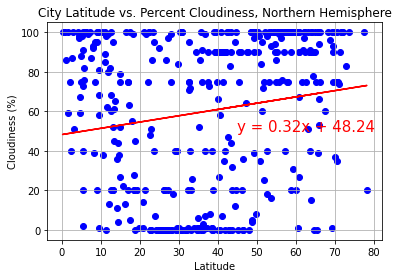

In [32]:
plt.scatter(x_north_lat, y_north_cloudy, facecolor="blue")
plt.title("City Latitude vs. Percent Cloudiness, Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_cloudy)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.15561


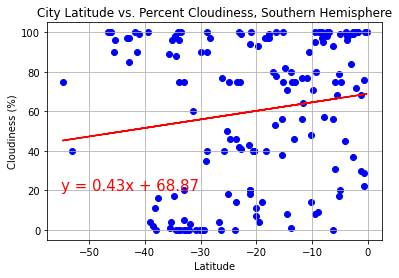

In [34]:
plt.scatter(x_south_lat, y_south_cloudy, facecolor="blue")
plt.title("City Latitude vs. Percent Cloudiness, Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_cloudy)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.16525


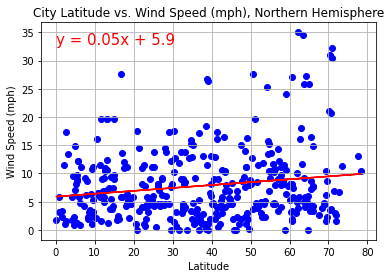

In [36]:
plt.scatter(x_north_lat, y_north_wind_speed, facecolor="blue")
plt.title("City Latitude vs. Wind Speed (mph), Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_wind_speed)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,33),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.26458


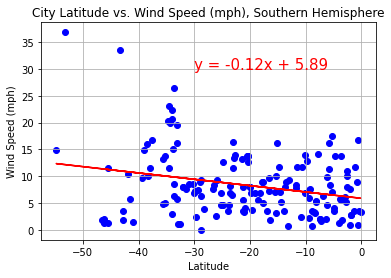

In [38]:
plt.scatter(x_south_lat, y_south_wind_speed, facecolor="blue")
plt.title("City Latitude vs. Wind Speed (mph), Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_wind_speed)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")